In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [2]:
#импортируем наши данные из 17 листа
df = pd.read_csv(r"C:\Users\Admin\Desktop\data_claster.csv", sep=';', header = 0, names = ['Permeability', 'Total thickness', 'Oil-saturated thickness', 'Oil saturation'])
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Desktop\\data_claster.csv'

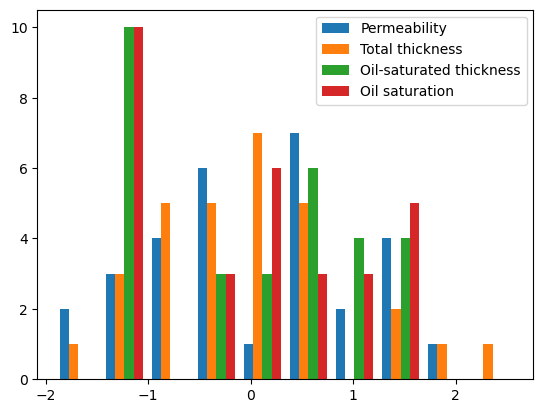

In [157]:
#гистограмма распределения признаков до стандартизации
plt.hist(df)
plt.legend(['Permeability', 'Total thickness', 'Oil-saturated thickness', 'Oil saturation'])

In [17]:
#стандартизируем наши данные
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
df

array([[-0.36179191,  2.58211691,  1.24041129, -1.27989084],
       [-1.24523728,  0.69276307,  0.94647496, -1.27989084],
       [-0.48799839,  1.40127076,  0.7113259 , -1.27989084],
       [-0.99282432,  0.69276307,  1.29919855, -1.02560789],
       [-0.48799839,  1.87360922,  0.82890043, -1.02560789],
       [-1.24523728, -0.01574462,  1.00526223, -1.27989084],
       [-0.86661784,  1.63743999,  1.12283676, -1.27989084],
       [-1.37144376,  0.22042461,  1.35798582, -1.27989084],
       [-1.75006321,  0.22042461,  0.7113259 , -1.27989084],
       [-1.49765024,  0.69276307,  1.53434761, -1.15274936],
       [ 1.5313053 ,  0.22042461, -0.40563213,  0.24580685],
       [ 0.39544697, -0.7242523 , -0.22927033,  0.11866537],
       [-0.36179191, -1.43275999,  0.35860231,  0.11866537],
       [-0.10937895, -1.19659076,  0.53496411, -0.26275905],
       [ 0.39544697, -0.7242523 ,  0.24102779, -0.0084761 ],
       [-0.23558543, -0.25191384,  0.59375137,  0.11866537],
       [ 0.9002729 , -0.

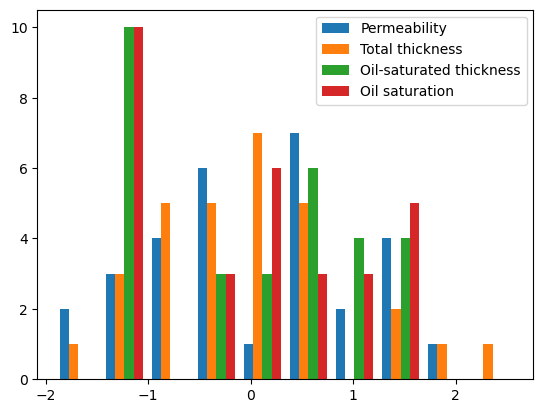

In [156]:
#гистограмма распределения признаков после стандартизации
plt.hist(df)
plt.legend(['Permeability', 'Total thickness', 'Oil-saturated thickness', 'Oil saturation'])

,Permeability,Total thickness,Oil-saturated thickness,Oil saturation
0,-0.361792,2.582117,1.240411,-1.279891
1,-1.245237,0.692763,0.946475,-1.279891
2,-0.487998,1.401271,0.711326,-1.279891
3,-0.992824,0.692763,1.299199,-1.025608
4,-0.487998,1.873609,0.828900,-1.025608
5,-1.245237,-0.015745,1.005262,-1.279891
6,-0.866618,1.637440,1.122837,-1.279891
7,-1.371444,0.220425,1.357986,-1.279891
8,-1.750063,0.220425,0.711326,-1.279891
9,-1.497650,0.692763,1.534348,-1.152749


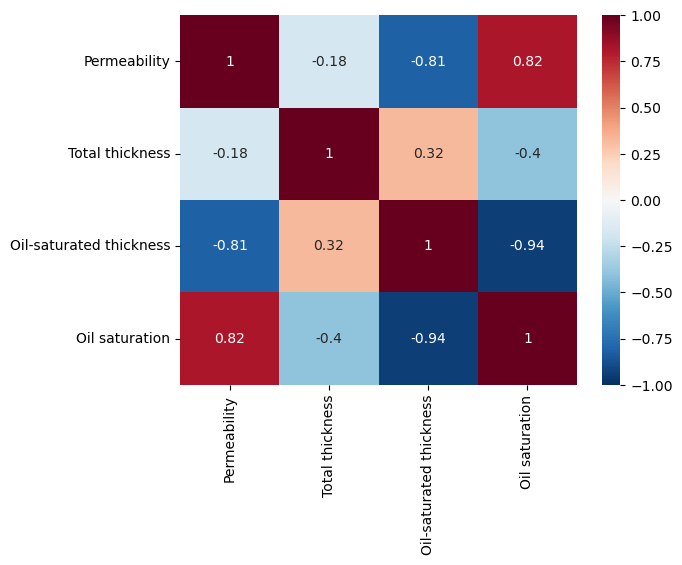

In [29]:
df = pd.DataFrame(data=df)
df = df.rename(columns={0: 'Permeability', 1:'Total thickness', 2:'Oil-saturated thickness', 3:'Oil saturation'})
coef_corr = df.corr()
hm = sb.heatmap(data = coef_corr, 
                cmap='RdBu_r', # задаёт цветовую схему
                annot=True, # рисует значения внутри ячеек
                vmin=-1, vmax=1)
df
#исключаем 4 столбец, т.к. он имеет максимальные по модулю коэффициенты корреляции

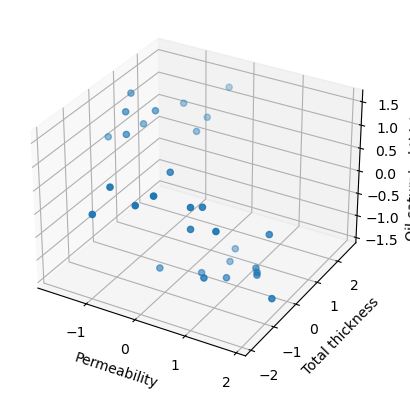

In [32]:
#3D поле наблюдений 
z = df['Oil-saturated thickness']
x = df['Permeability']
y = df['Total thickness']


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, marker='o')
    
ax.set_xlabel('Permeability')
ax.set_ylabel('Total thickness')
ax.set_zlabel('Oil-saturated thickness')

plt.show()

In [71]:
from scipy.cluster.hierarchy import dendrogram
def plot_cluster(model, data, title):
    if hasattr(model, "labels_"):
        pred = model.labels_.astype(int)
    else:
        pred = model.predict(data)
    plt.figure(figsize=(16,9))
    x = data['Permeability']
    y = data['Total thickness']
    z = data['Oil-saturated thickness']
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection='3d')

    ax.scatter(x, y, z, c = pred, marker='o')

    ax.set_xlabel('Permeability')
    ax.set_ylabel('Total thickness')
    ax.set_zlabel('Oil-saturated thickness')
    plt.title(title)
    plt.show()
    

F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Кластеры: [1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2]


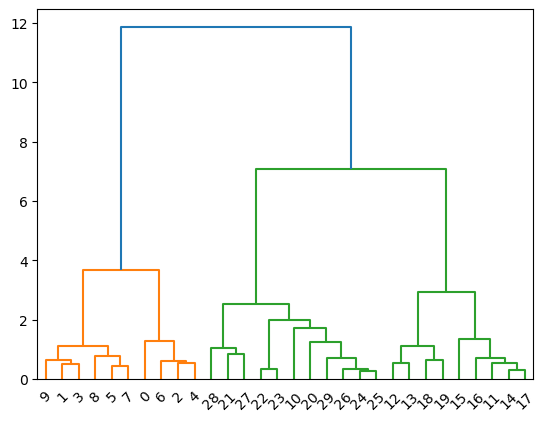

<Figure size 1600x900 with 0 Axes>

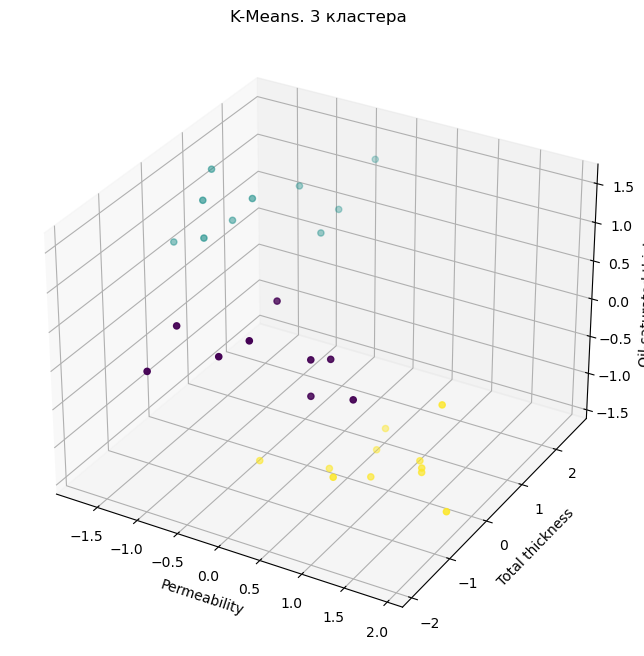

In [160]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans 
from sklearn.neighbors import KNeighborsClassifier 
from scipy.cluster.hierarchy import dendrogram, linkage 

clstr1 = KMeans(n_clusters = 3, algorithm = 'lloyd')
clstr1.fit(df)
Z = linkage(df, method='ward')
dendrogram(Z);
labels = clstr1.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr1, df, 'K-Means. 3 кластера')

F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Кластеры: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


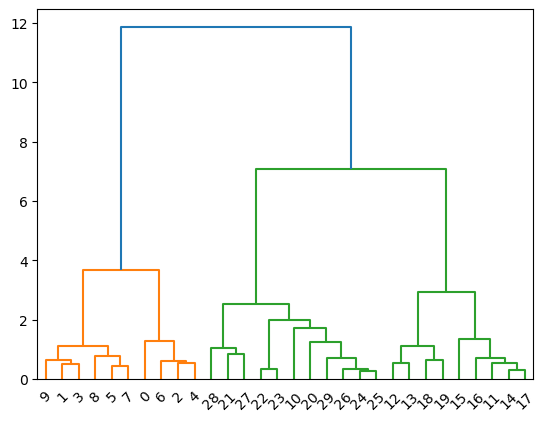

<Figure size 1600x900 with 0 Axes>

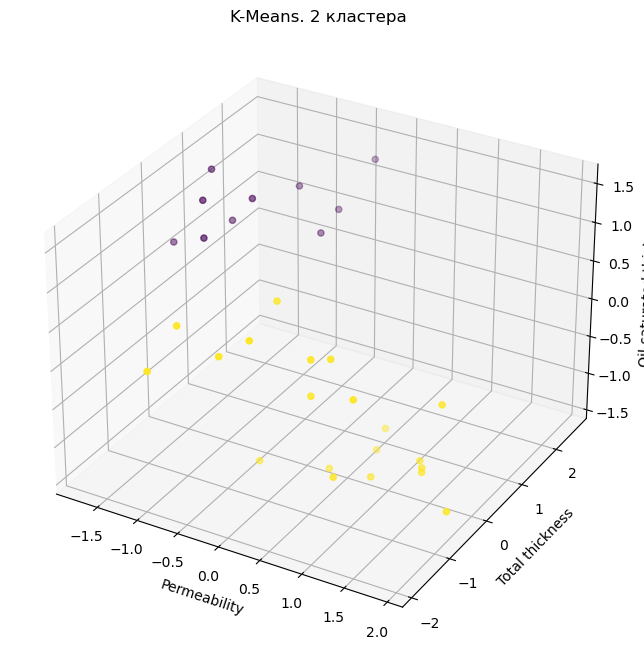

In [161]:
clstr0 = KMeans(n_clusters = 2, algorithm = 'lloyd')
clstr0.fit(df)
Z = linkage(df, method='ward')
dendrogram(Z);
labels = clstr0.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr0, df, 'K-Means. 2 кластера')

In [75]:
clstr1 = KNeighborsClassifier(n_clusters=3) 
clstr1.fit(df)
y_knn = knn.predict(df) 
Z = linkage(df, method='ward')
dendrogram(Z);

TypeError: KNeighborsClassifier.__init__() got an unexpected keyword argument 'n_clusters'

F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Кластеры: [0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


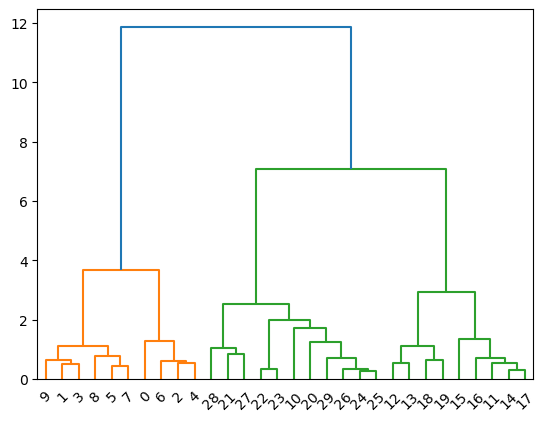

<Figure size 1600x900 with 0 Axes>

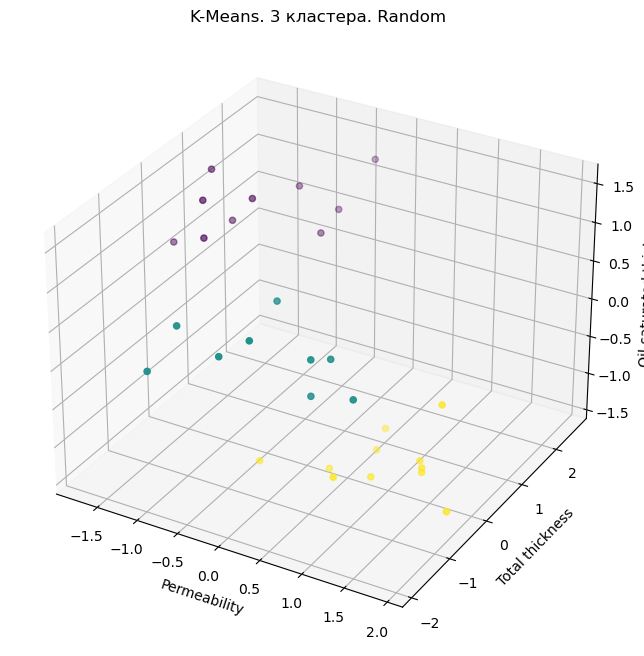

In [162]:
clstr2 = KMeans(n_clusters = 3, init='random', algorithm = 'lloyd')
clstr2.fit(df)
Z = linkage(df, method='ward')
dendrogram(Z);
labels = clstr2.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr2, df, 'K-Means. 3 кластера. Random')

Кластеры: [0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


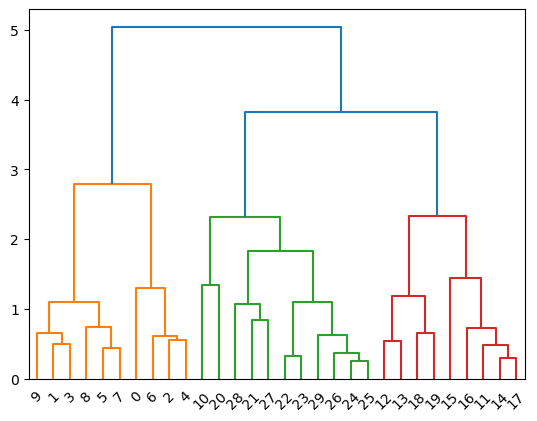

<Figure size 1600x900 with 0 Axes>

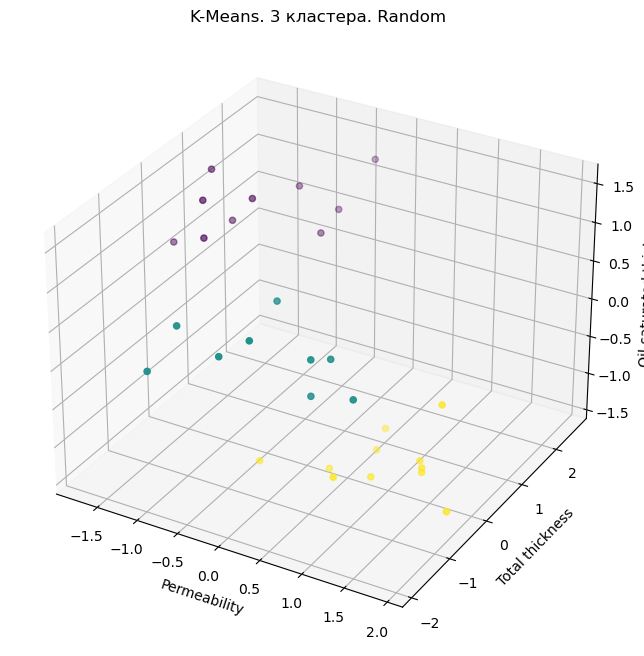

In [159]:
clstr9 = KMeans(n_clusters = 3, init='random', algorithm = 'elkan')
clstr9.fit(df)
Z = linkage(df, method='complete')
dendrogram(Z);
labels = clstr9.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr9, df, 'K-Means. 3 кластера. Random')

In [163]:
df_labels = pd.DataFrame()
df_labels['0'] = pd.DataFrame(clstr0.labels_)
df_labels['1'] = pd.DataFrame(clstr1.labels_)
df_labels['2'] = pd.DataFrame(clstr2.labels_)
df_labels['9'] = pd.DataFrame(clstr9.labels_)
df_labels

,0,1,2,9
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


Кластеры: [0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


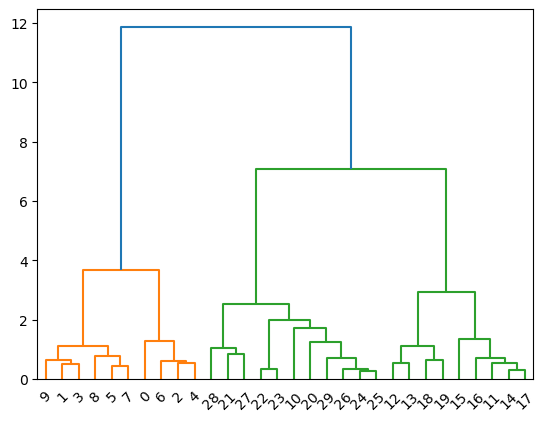

<Figure size 1600x900 with 0 Axes>

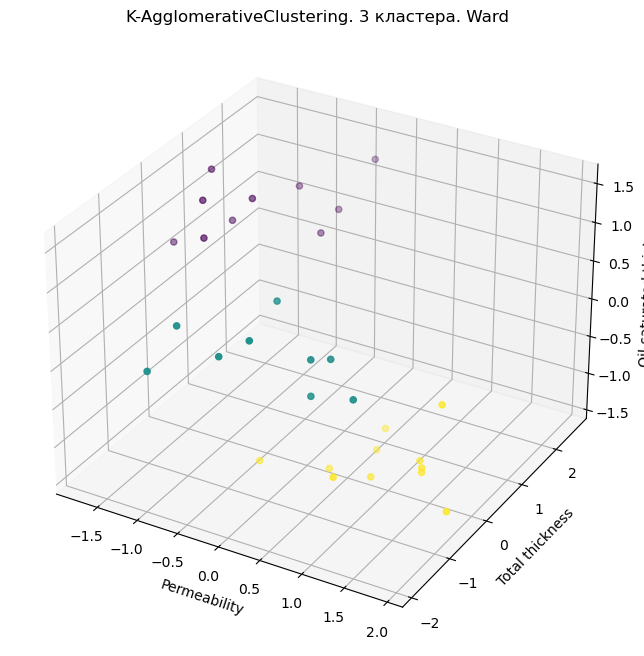

In [179]:
clstr3 = AgglomerativeClustering(n_clusters=3, linkage='ward') 
clstr3.fit(df)
Z = linkage(df, method='ward')
dendrogram(Z);
labels = clstr3.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr3, df, 'AgglomerativeClustering. 3 кластера. Ward')

Кластеры: [0 0 0 0 0 0 0 0 0 0 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1]


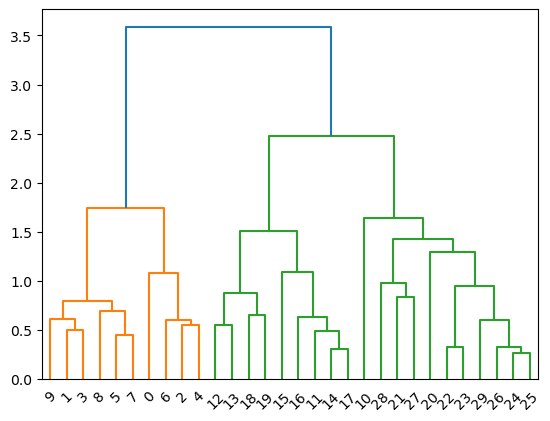

<Figure size 1600x900 with 0 Axes>

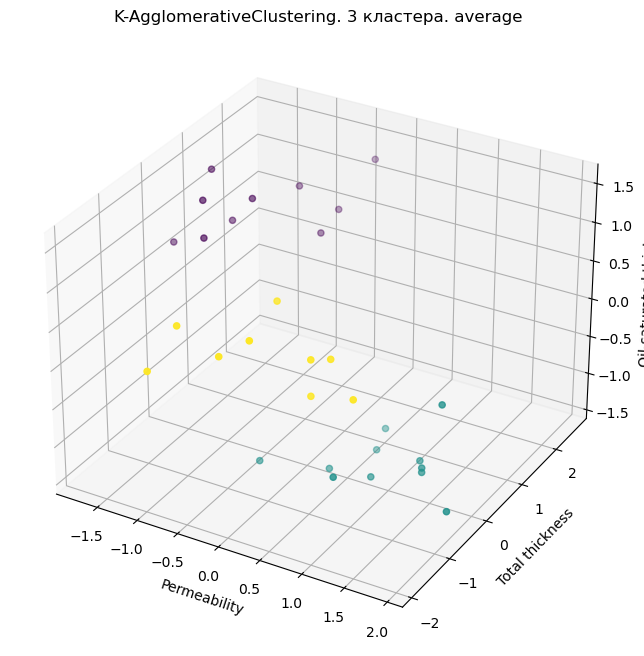

In [180]:
clstr4 = AgglomerativeClustering(n_clusters=3, linkage='average') 
clstr4.fit(df)
Z = linkage(df, method='average')
dendrogram(Z);
labels = clstr4.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr4, df, 'AgglomerativeClustering. 3 кластера. average')

Кластеры: [1 1 1 1 1 1 1 1 1 1 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]


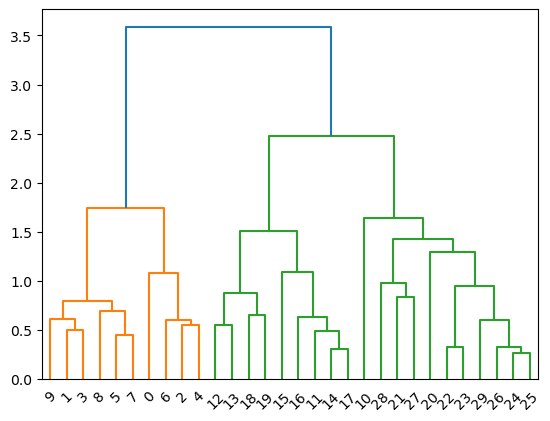

<Figure size 1600x900 with 0 Axes>

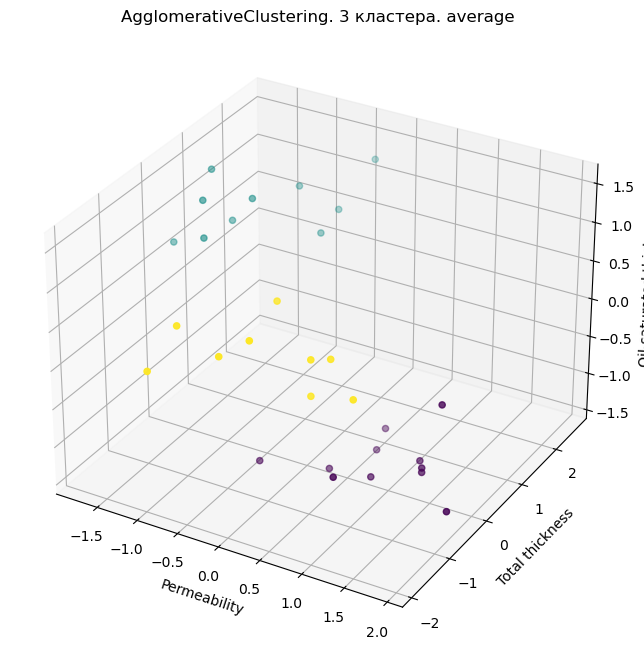

In [168]:
clstr4_manhattan = AgglomerativeClustering(n_clusters=3, linkage='average', metric ='manhattan') 
clstr4_manhattan.fit(df)
Z = linkage(df, method='average')
dendrogram(Z);
labels = clstr4_manhattan.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr4_manhattan, df, 'AgglomerativeClustering. 3 кластера. average')

Кластеры: [1 3 1 3 1 3 1 3 3 3 2 0 0 0 0 0 0 0 0 0 2 4 2 2 2 2 2 4 4 2]


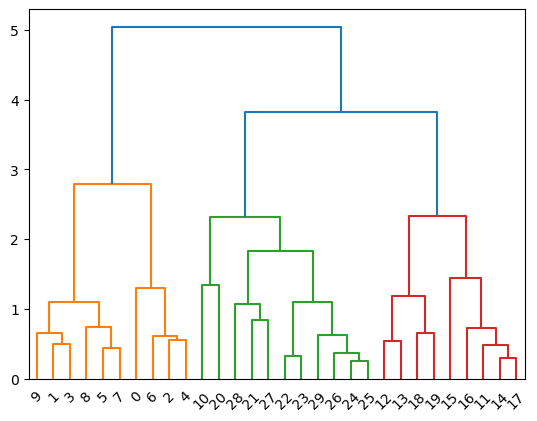

<Figure size 1600x900 with 0 Axes>

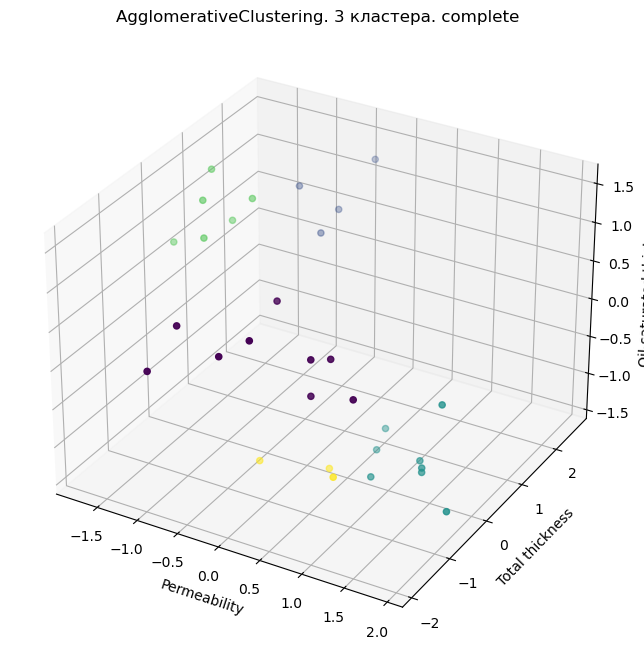

In [176]:
from scipy.spatial import distance
def sim(x, y): 
    return distance.chebyshev(x,y)


# Method to calculate distances between all sample pairs
from sklearn.metrics import pairwise_distances
def sim_chebyshev(X):
    return pairwise_distances(X, metric=sim)

clstr_chebyshev = AgglomerativeClustering(n_clusters=5, metric = sim_chebyshev, linkage='complete')
clstr_chebyshev.fit(df)
Z = linkage(df, method='complete')
dendrogram(Z);
labels = clstr_chebyshev.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr_chebyshev, df, 'AgglomerativeClustering. 3 кластера. complete')

Кластеры: [1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2]


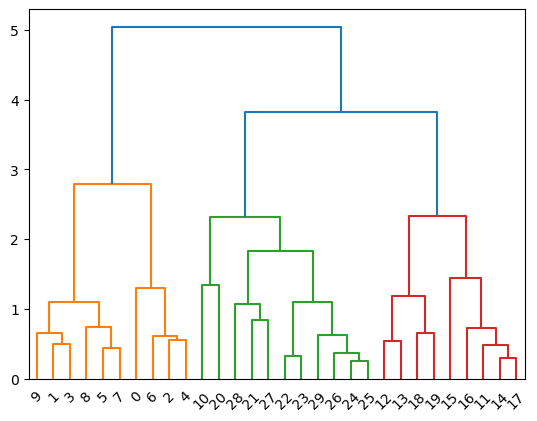

<Figure size 1600x900 with 0 Axes>

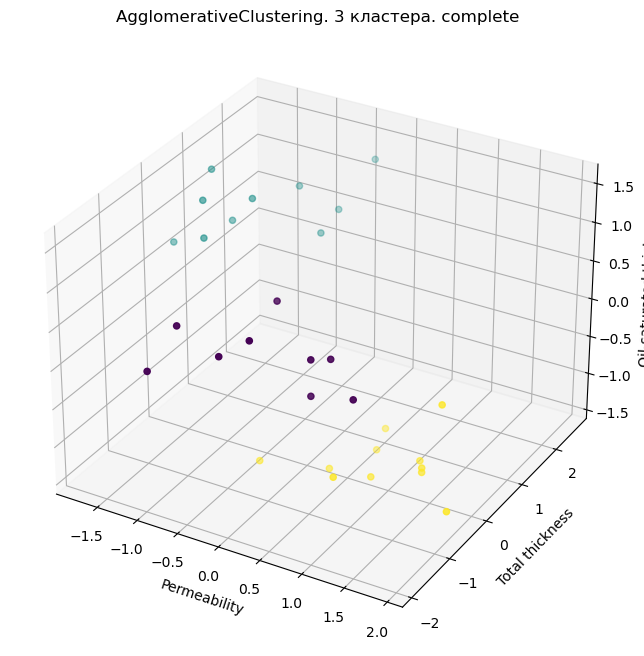

In [171]:
clstr5 = AgglomerativeClustering(n_clusters=3, linkage='complete', metric = 'cosine') 
clstr5.fit(df)
Z = linkage(df, method='complete')
dendrogram(Z);
labels = clstr5.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr5, df, 'AgglomerativeClustering. 3 кластера. complete')

Кластеры: [1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


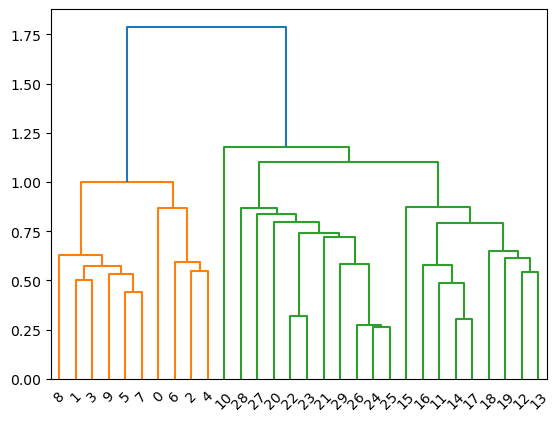

<Figure size 1600x900 with 0 Axes>

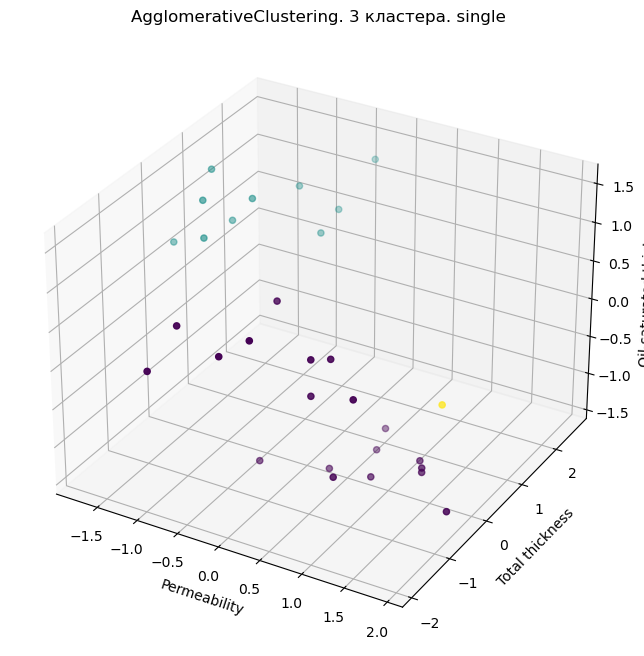

In [170]:
clstr6 = AgglomerativeClustering(n_clusters=3, linkage='single') 
clstr6.fit(df)
Z = linkage(df, method='single')
dendrogram(Z);
labels = clstr6.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr6, df, 'AgglomerativeClustering. 3 кластера. single')

Кластеры: [0 0 0 0 0 0 0 0 0 0 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1]


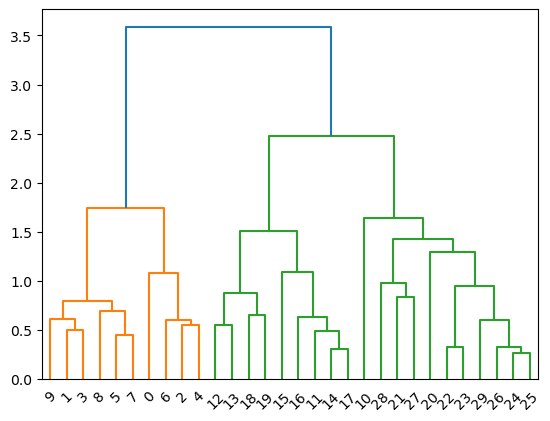

<Figure size 1600x900 with 0 Axes>

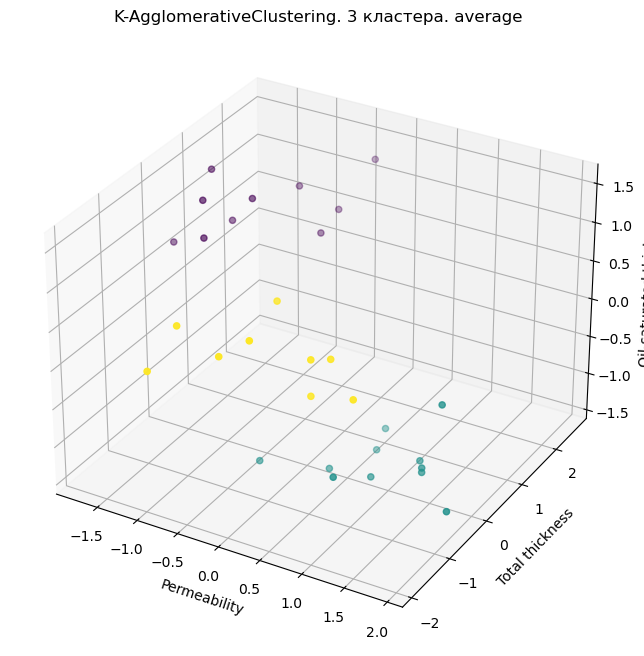

In [135]:
clstr7 = AgglomerativeClustering(n_clusters=3, linkage='average', metric = 'l2') 
clstr7.fit(df)
Z = linkage(df, method='average')
dendrogram(Z);
labels = clstr7.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr7, df, 'AgglomerativeClustering. 3 кластера. average')

In [178]:
df_labels = pd.DataFrame()
df_labels['ward_euclide'] = pd.DataFrame(clstr3.labels_)
df_labels['average_euclide'] = pd.DataFrame(clstr4.labels_)
df_labels['complete_cosine'] = pd.DataFrame(clstr5.labels_)
df_labels['single_euclide'] = pd.DataFrame(clstr6.labels_)
df_labels['average_l2'] = pd.DataFrame(clstr7.labels_)
df_labels['manhattan_average'] = pd.DataFrame(clstr4_manhattan.labels_)
df_labels['chebyshev_complete'] = pd.DataFrame(clstr_chebyshev.labels_)
df_labels

,ward_euclide,average_euclide,complete_cosine,single_euclide,average_l2,manhattan_average,chebyshev_complete
0,0,1,1,1,0,1,1
1,0,1,1,1,0,1,3
2,0,1,1,1,0,1,1
3,0,1,1,1,0,1,3
4,0,1,1,1,0,1,1
5,0,1,1,1,0,1,3
6,0,1,1,1,0,1,1
7,0,1,1,1,0,1,3
8,0,1,1,1,0,1,3
9,0,1,1,1,0,1,3


Кластеры: [-1  0 -1  0 -1  0 -1  0  0  0 -1  1 -1  1  1  1  1  1 -1 -1  2  2  2  2
  2  2  2 -1  2  2]


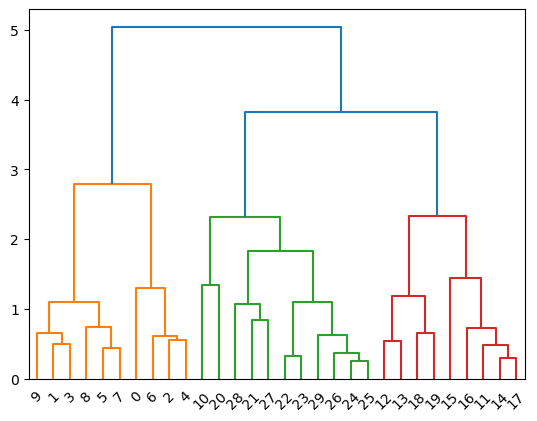

<Figure size 1600x900 with 0 Axes>

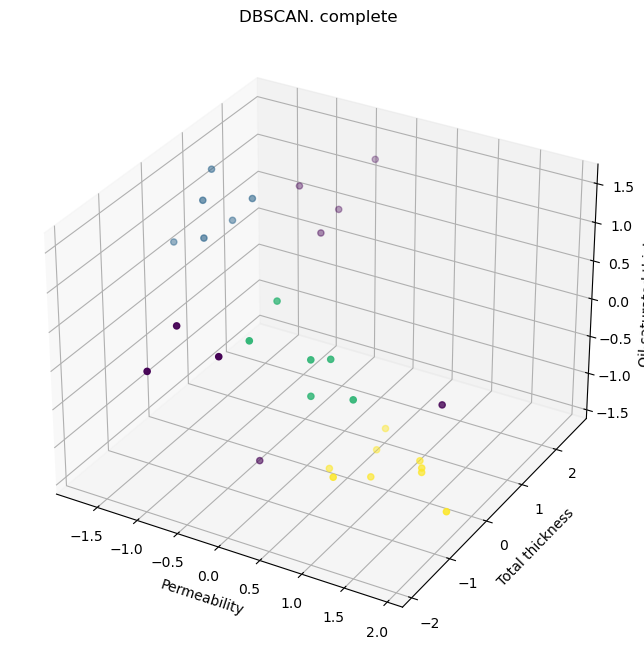

In [120]:
from sklearn.cluster import DBSCAN 
clstr8 = DBSCAN(eps=1, min_samples=5) 
# кластеризация 
clstr8.fit(df) 
y_ward = clstr8.labels_ 

Z = linkage(df, method='complete')
dendrogram(Z);
labels = clstr8.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr8, df, 'DBSCAN. complete')

Кластеры: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


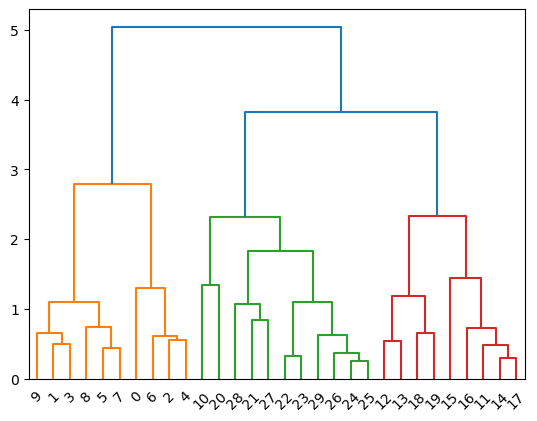

<Figure size 1600x900 with 0 Axes>

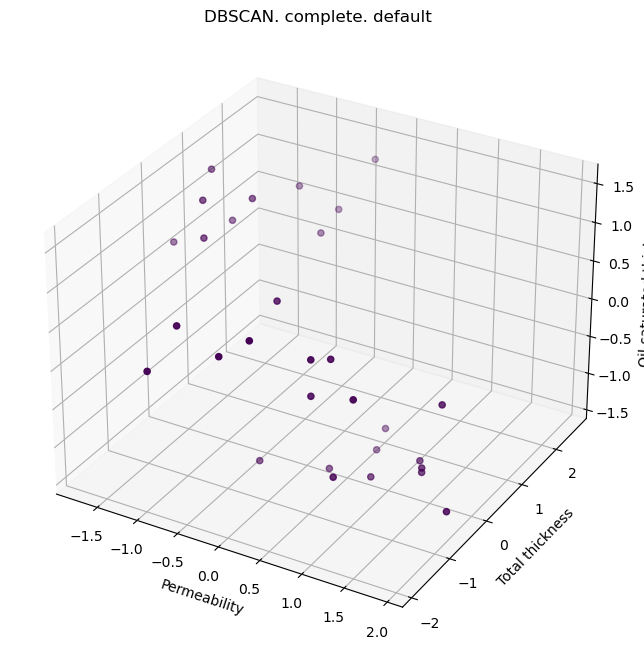

In [190]:
clstr_default = DBSCAN(eps=0.5, min_samples=5) 
# кластеризация 
clstr_default.fit(df) 
y_ward = clstr_default.labels_ 
# max_ = sim_chebyshev(df)
Z = linkage(df, method='complete')
dendrogram(Z);
labels = clstr_default.labels_ 
# Вывод результатов кластеризации 
# print('Min =', (max_))
print("Кластеры:", labels) 
plot_cluster(clstr_default, df, 'DBSCAN. complete. default')

Кластеры: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


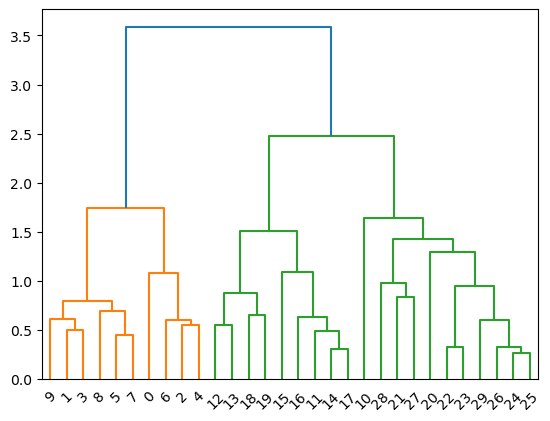

<Figure size 1600x900 with 0 Axes>

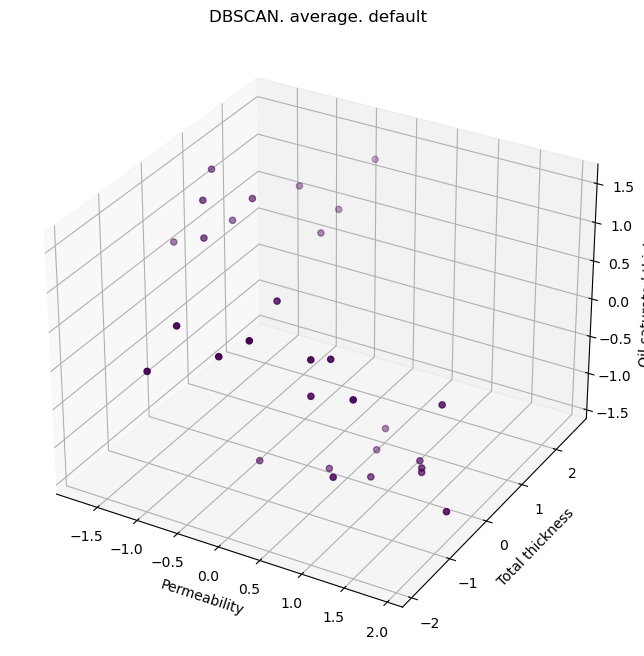

In [184]:
clstr_default_average = DBSCAN(eps=0.5, min_samples=5) 
# кластеризация 
clstr_default_average.fit(df) 
y_ward = clstr_default_average.labels_ 

Z = linkage(df, method='average')
dendrogram(Z);
labels = clstr_default_average.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr_default_average, df, 'DBSCAN. average. default')

Кластеры: [-1  0 -1  0 -1  0 -1  0 -1  0 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1
  2  2  2 -1 -1  2]


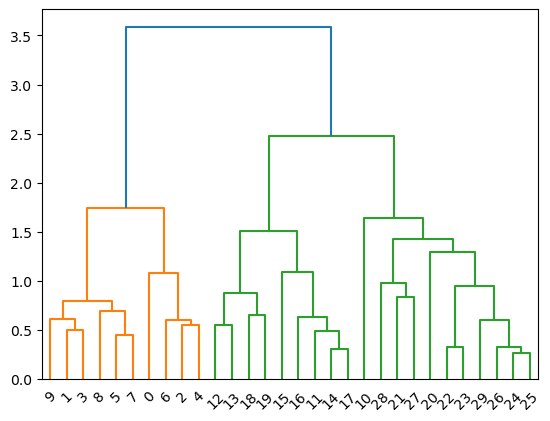

<Figure size 1600x900 with 0 Axes>

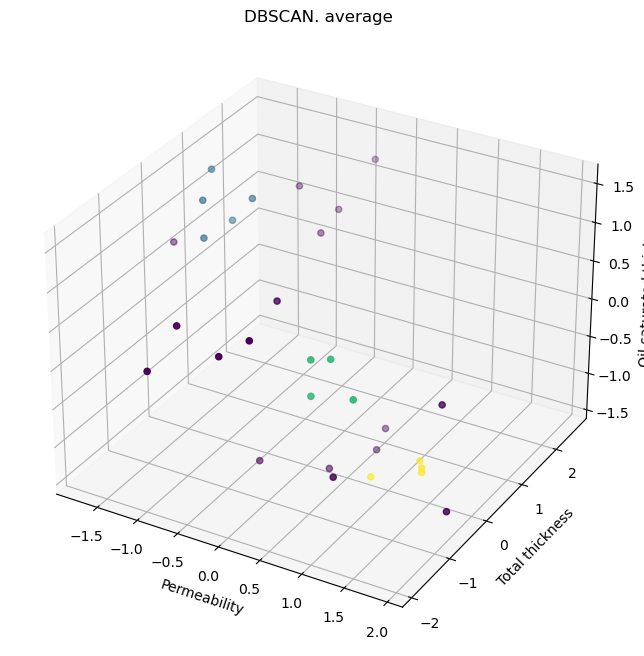

In [191]:
from sklearn.cluster import DBSCAN 
clstr10 = DBSCAN(eps=0.7, min_samples=4) 
# кластеризация 
clstr10.fit(df) 
y_ward = clstr10.labels_ 

Z = linkage(df, method='average')
dendrogram(Z);
labels = clstr10.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr10, df, 'DBSCAN. average')

Кластеры: [ 0  0  0  0  0  0  0  0  0  0 -1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2]


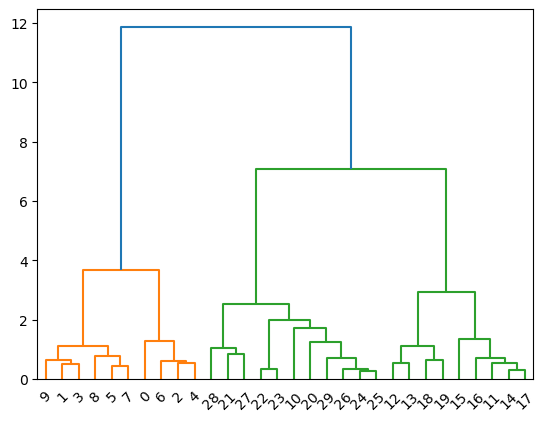

<Figure size 1600x900 with 0 Axes>

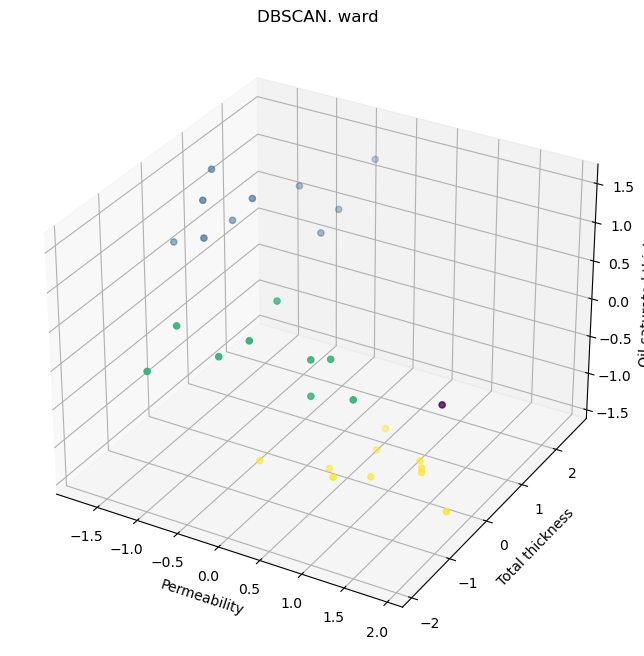

In [192]:
from sklearn.cluster import DBSCAN 
clstr11 = DBSCAN(eps=1.1, min_samples=3) 
# кластеризация 
clstr11.fit(df) 
y_ward = clstr11.labels_ 

Z = linkage(df, method='ward')
dendrogram(Z);
labels = clstr11.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr11, df, 'DBSCAN. ward')

Кластеры: [-1  0 -1  0 -1  0 -1  0 -1  0 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1
  2  2  2 -1 -1  2]


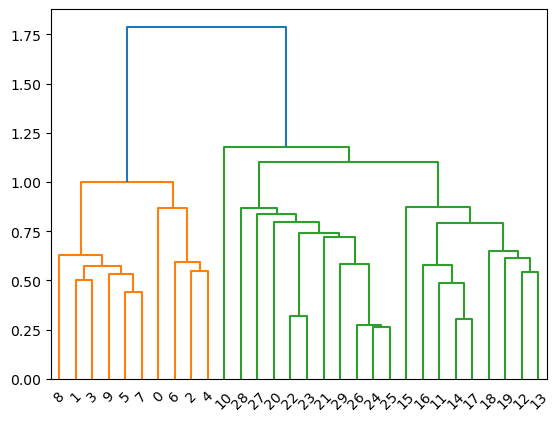

<Figure size 1600x900 with 0 Axes>

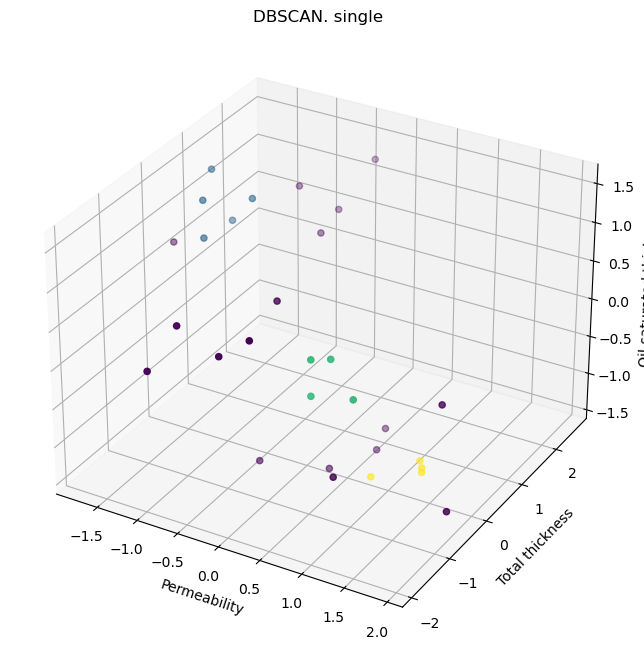

In [193]:
from sklearn.cluster import DBSCAN 
clstr12 = DBSCAN(eps=0.7, min_samples=4) 
# кластеризация 
clstr12.fit(df) 
y_ward = clstr12.labels_ 

Z = linkage(df, method='single')
dendrogram(Z);
labels = clstr12.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr12, df, 'DBSCAN. single')

Кластеры: [-1  0 -1  0 -1  0 -1  0  0  0 -1  1 -1  1  1 -1  1  1 -1 -1  2  2  2  2
  2  2  2 -1 -1  2]


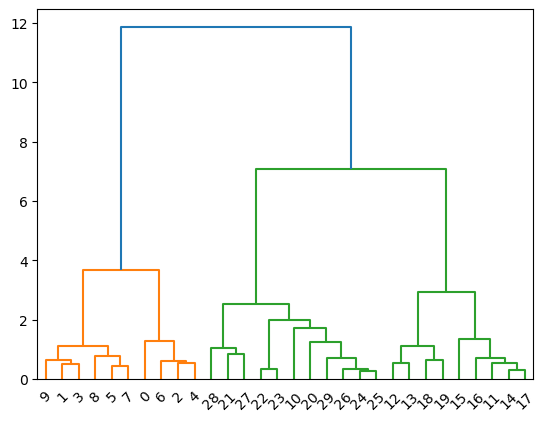

<Figure size 1600x900 with 0 Axes>

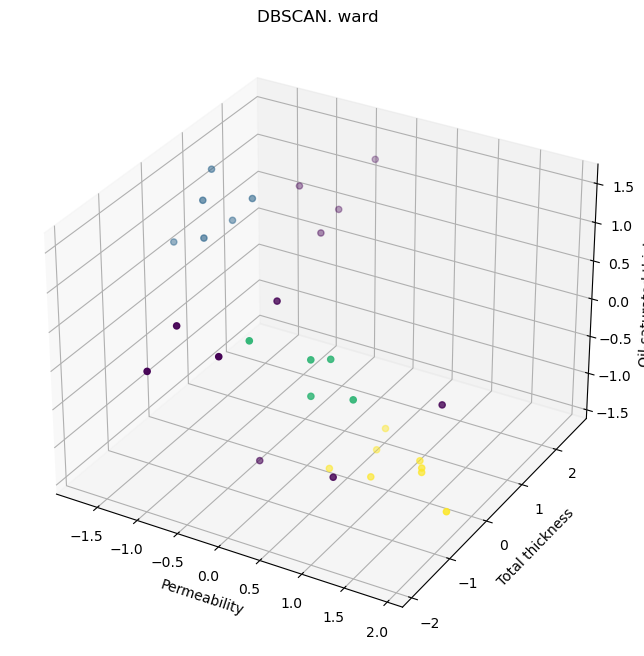

In [194]:
from sklearn.cluster import DBSCAN 
clstr13 = DBSCAN(eps=0.8, min_samples=5) 
# кластеризация 
clstr13.fit(df) 
y_ward = clstr13.labels_ 

Z = linkage(df, method='ward')
dendrogram(Z);
labels = clstr13.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr13, df, 'DBSCAN. ward')

Кластеры: [ 0  0  0  0  0  0  0  0  0  0 -1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2 -1  2  2]


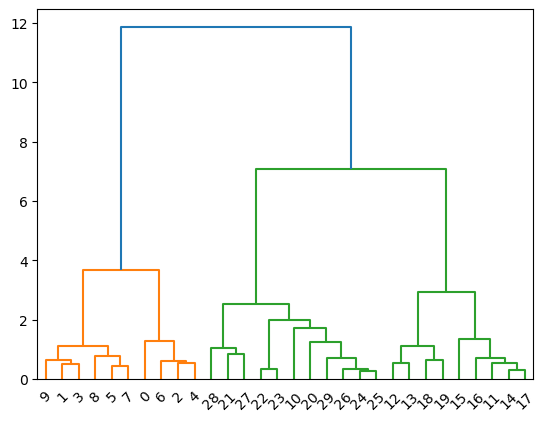

<Figure size 1600x900 with 0 Axes>

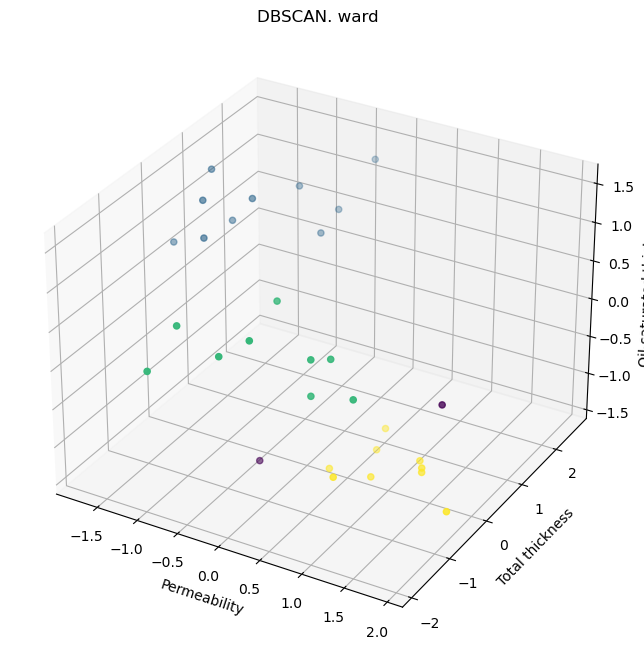

In [220]:
clstr13 = DBSCAN(eps=1.1, min_samples=5) 
# кластеризация 
clstr13.fit(df) 
y_ward = clstr13.labels_ 

Z = linkage(df, method='ward')
dendrogram(Z);
labels = clstr13.labels_ 
# Вывод результатов кластеризации 
print("Кластеры:", labels) 
plot_cluster(clstr13, df, 'DBSCAN. ward')

In [196]:
df_labels = pd.DataFrame()
df_labels['default_complete'] = pd.DataFrame(clstr_default.labels_)
df_labels['default_average'] = pd.DataFrame(clstr_default_average.labels_)
df_labels['1 5 complete'] = pd.DataFrame(clstr8.labels_)
df_labels['0.7 4 average'] = pd.DataFrame(clstr10.labels_)
df_labels['1.1 3 ward'] = pd.DataFrame(clstr11.labels_)
df_labels['0.7 4 single'] = pd.DataFrame(clstr12.labels_)
df_labels['0.8 5 ward'] = pd.DataFrame(clstr13.labels_)
df_labels

,default_complete,default_average,1 5 complete,0.7 4 average,1.1 3 ward,0.7 4 single,0.8 5 ward
0,-1,-1,-1,-1,0,-1,-1
1,-1,-1,0,0,0,0,0
2,-1,-1,-1,-1,0,-1,-1
3,-1,-1,0,0,0,0,0
4,-1,-1,-1,-1,0,-1,-1
5,-1,-1,0,0,0,0,0
6,-1,-1,-1,-1,0,-1,-1
7,-1,-1,0,0,0,0,0
8,-1,-1,0,-1,0,-1,0
9,-1,-1,0,0,0,0,0
